# Results v7:

## General Hyperparameters:

- Dataset: MNIST (full-res 28x28px)
- Model: 2-layer MLP (784-64-ReLU-10) -> 50,890 parameters
- Training batch size: 32
- Optimizer: SGD
- Learning rate: 0.001
- Epochs: 5

## LA Hyperparameters:
- LTK batch sizes: $[2^i]_{i=0}^{10}$
- Sampling methods: uniform, loss, loss-inv
- LTK computations after 8000 training steps (nearly converged, >90% test accuracy)
- LTK samples per computation iteration: 1
- LTK samples over test dataset: 20

In [11]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from tueplots import bundles

plt.rcParams.update(bundles.beamer_moml())

In [12]:
results_path = "../results_v7"
min_exp = 0
max_exp = 10
num_steps = 8000
sampling_methods = ["uniform", "loss", "loss_inv"]

sample_sizes = [2**x for x in range(min_exp, max_exp)]

## Eigenspace Overlap (vs. full GGN):

In [13]:
laplace_diagonals = {}

for sampling_method in sampling_methods:
    laplace_diagonals[sampling_method] = []
    for sample_size in sample_sizes:
        laplace_diagonals[sampling_method].append(np.load(str(Path(results_path, sampling_method, f"laplace_diagonal_{sample_size}_{num_steps}.npy"))))
    laplace_diagonals[sampling_method] = np.nan_to_num(np.stack(laplace_diagonals[sampling_method]))

In [14]:
# Sample-size, num-test-samples, diag
_, num_test_samples, num_classes = laplace_diagonals["loss"].shape

### Visual comparison with examples:

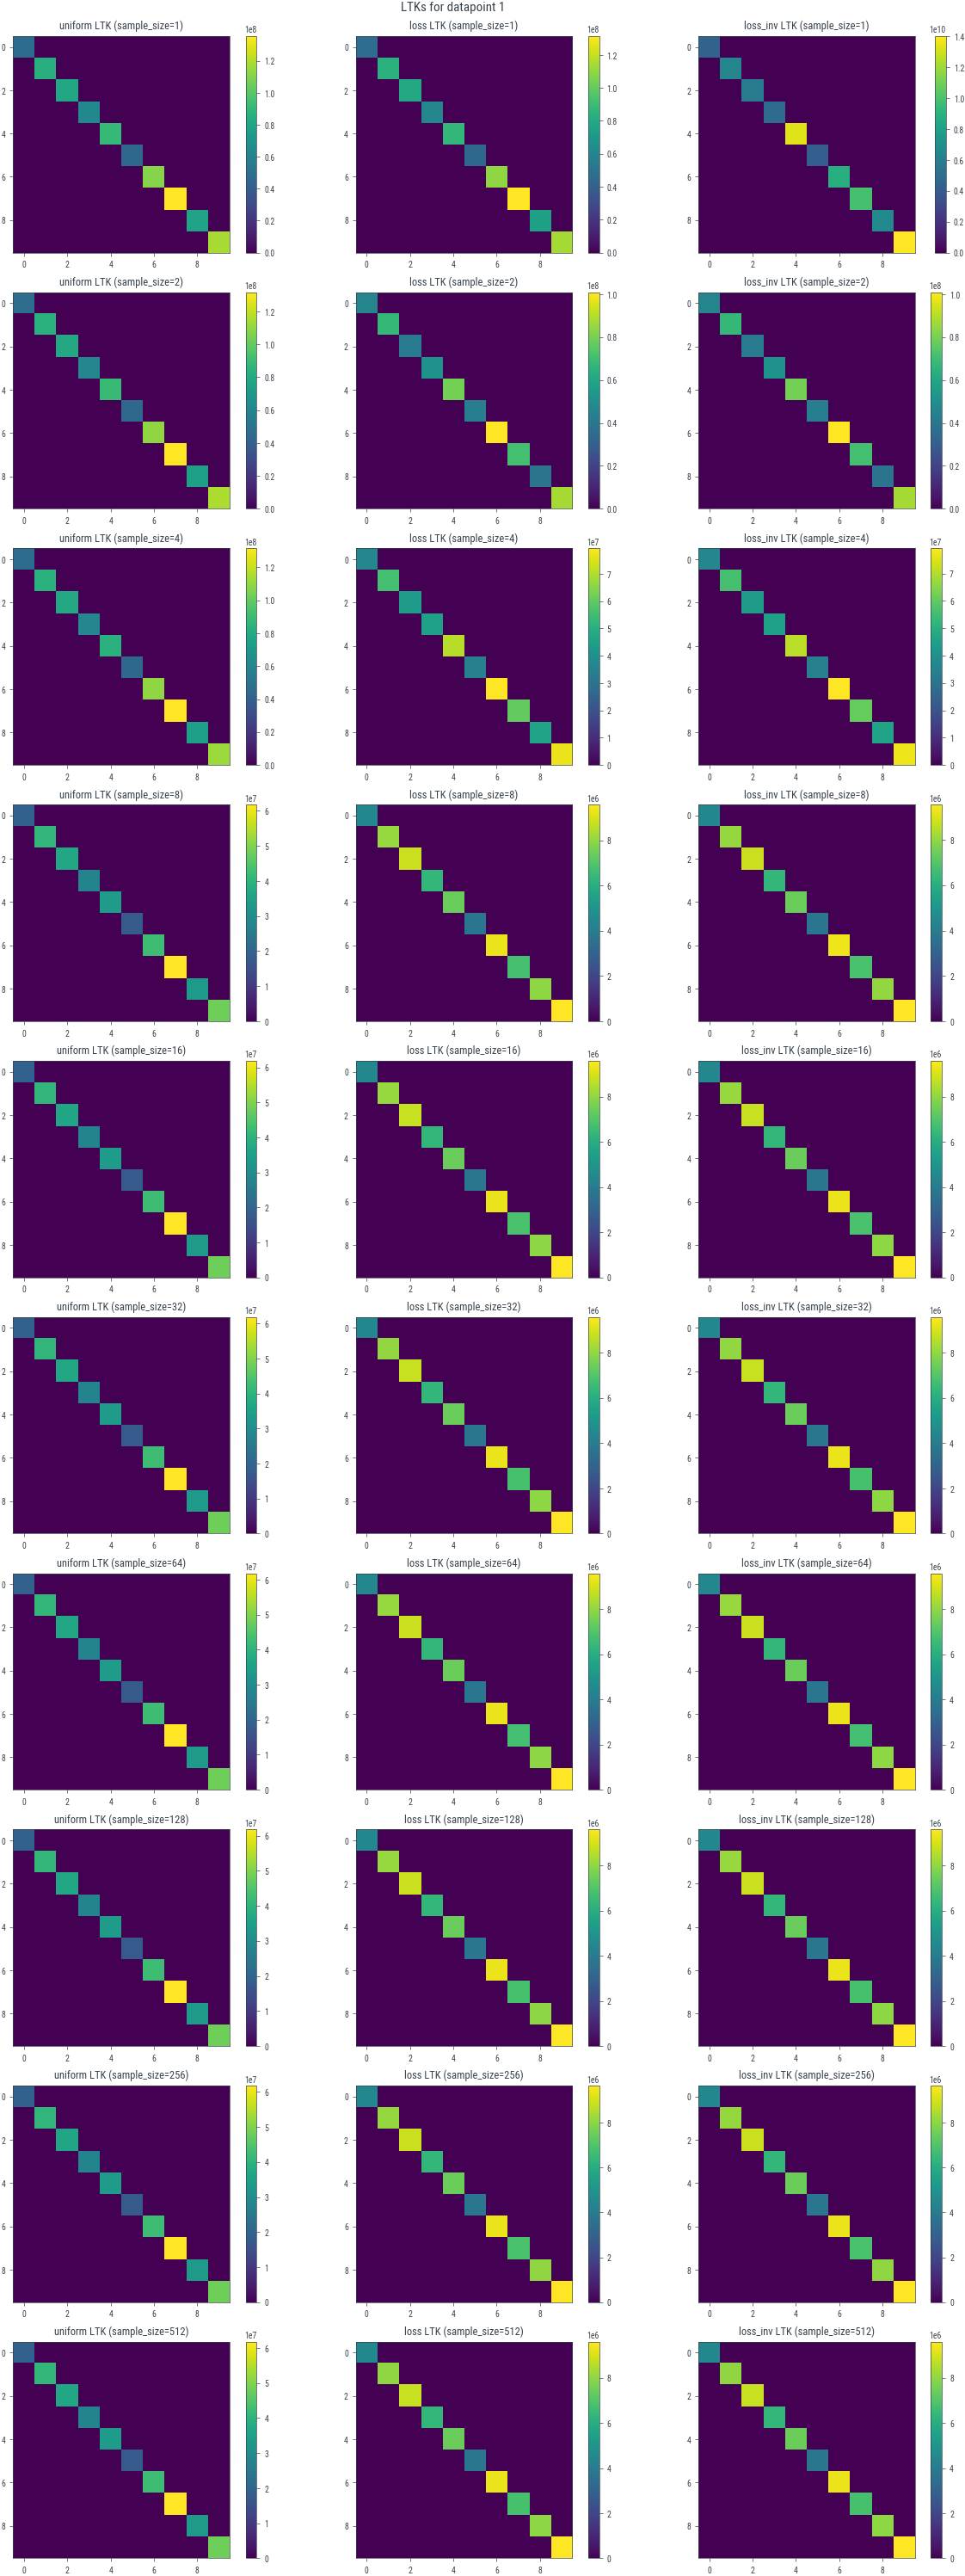

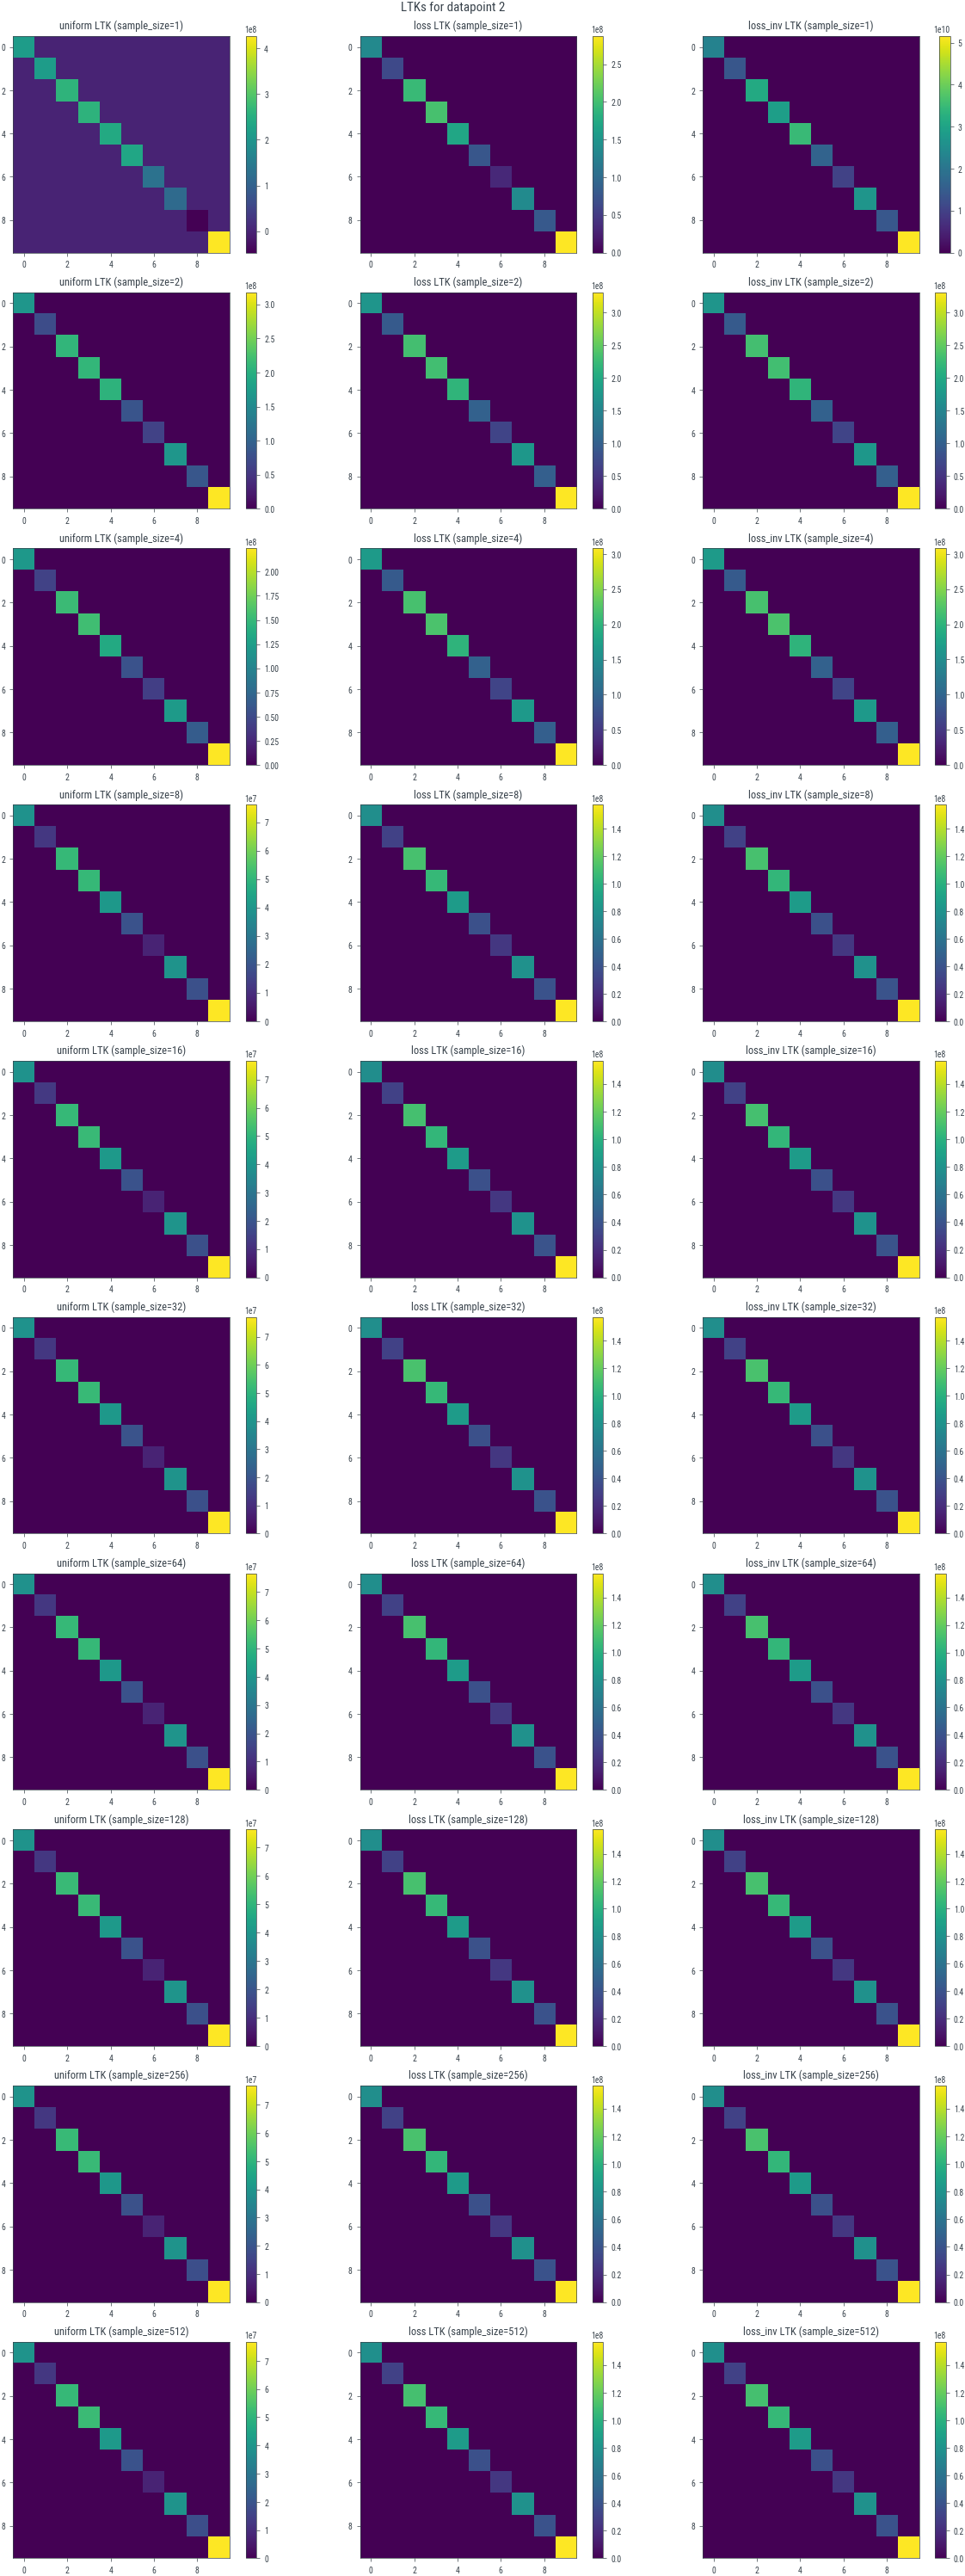

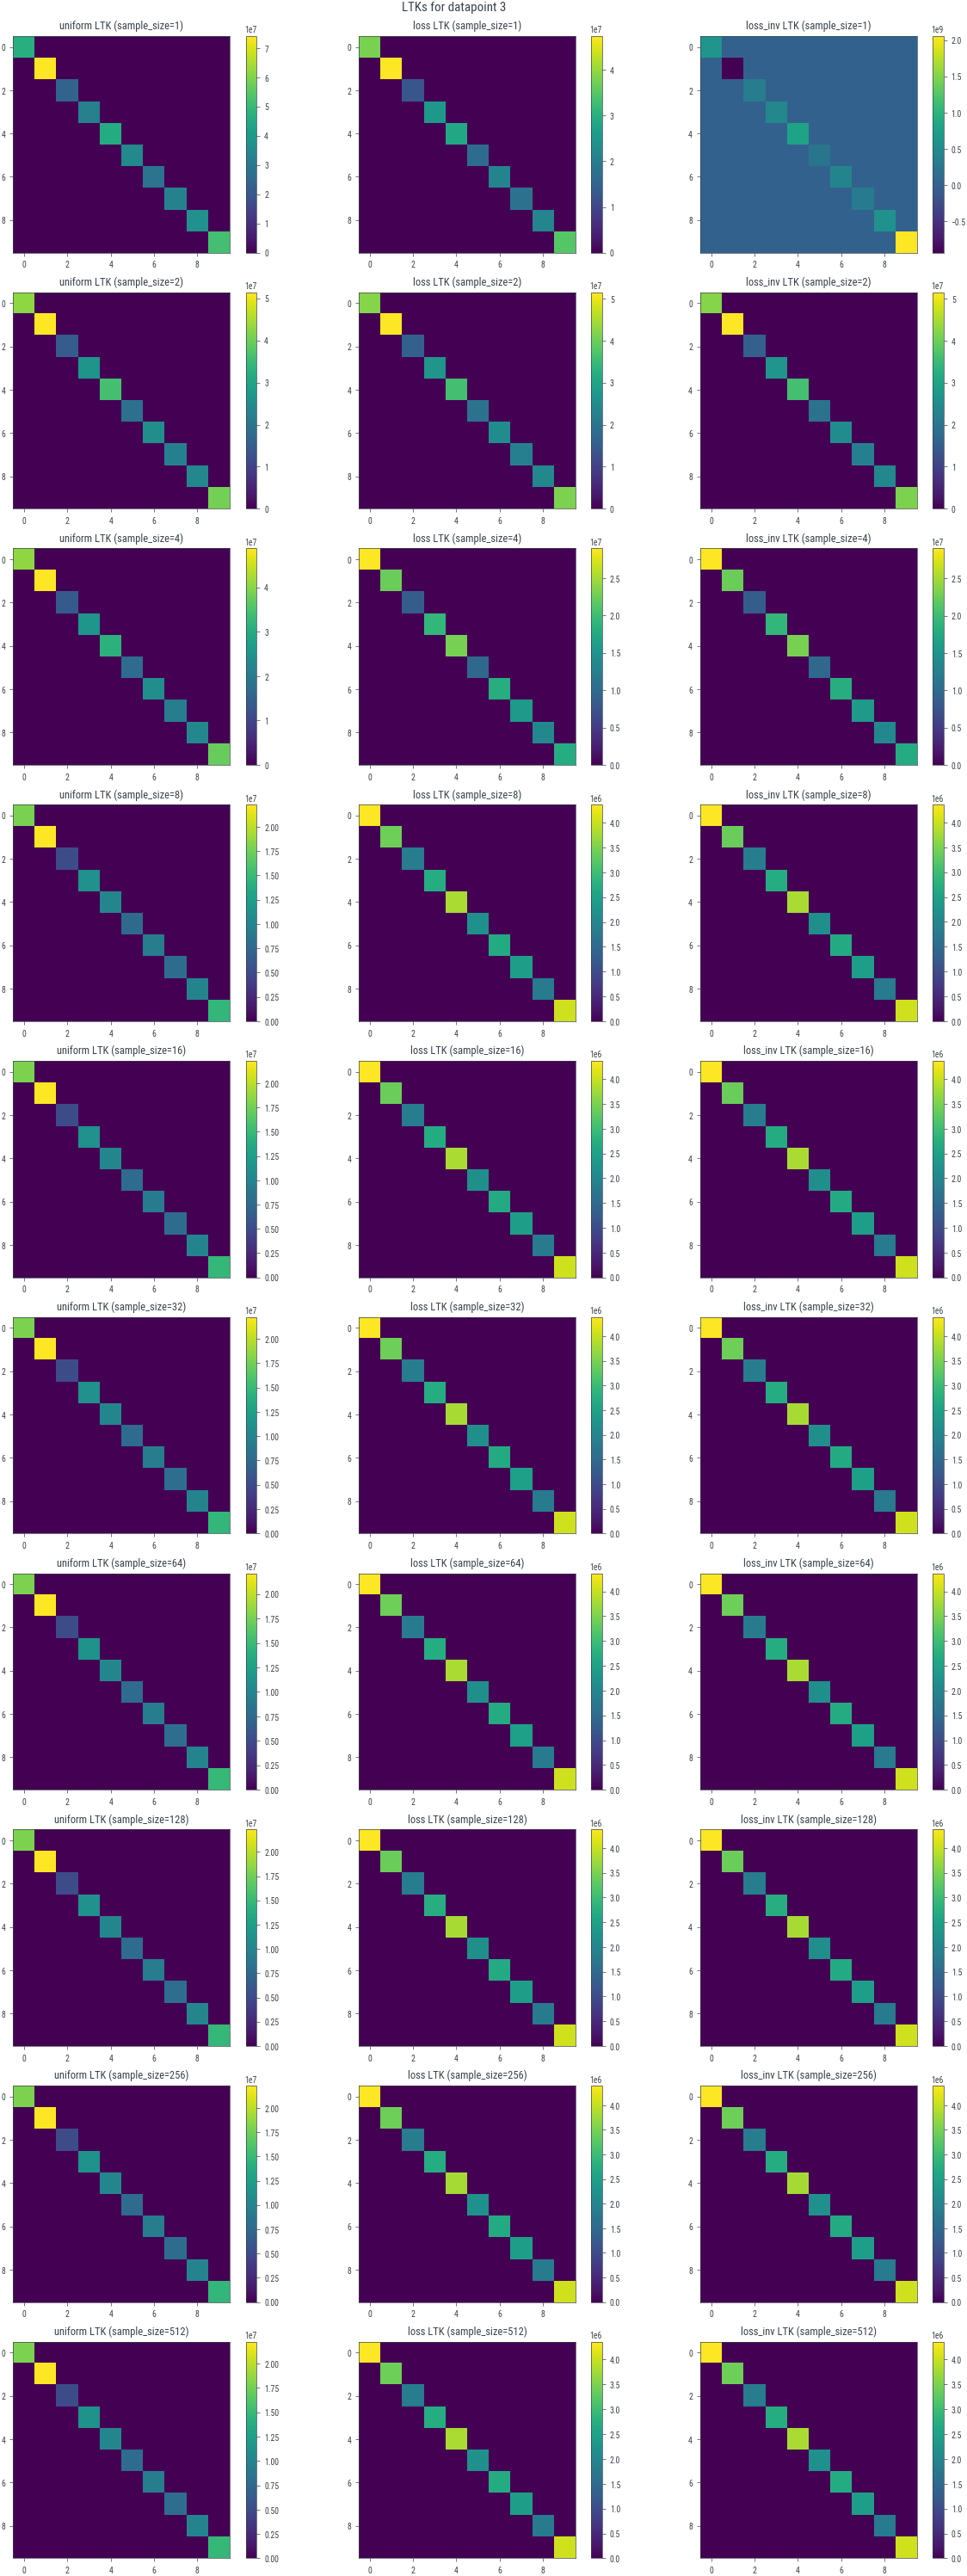

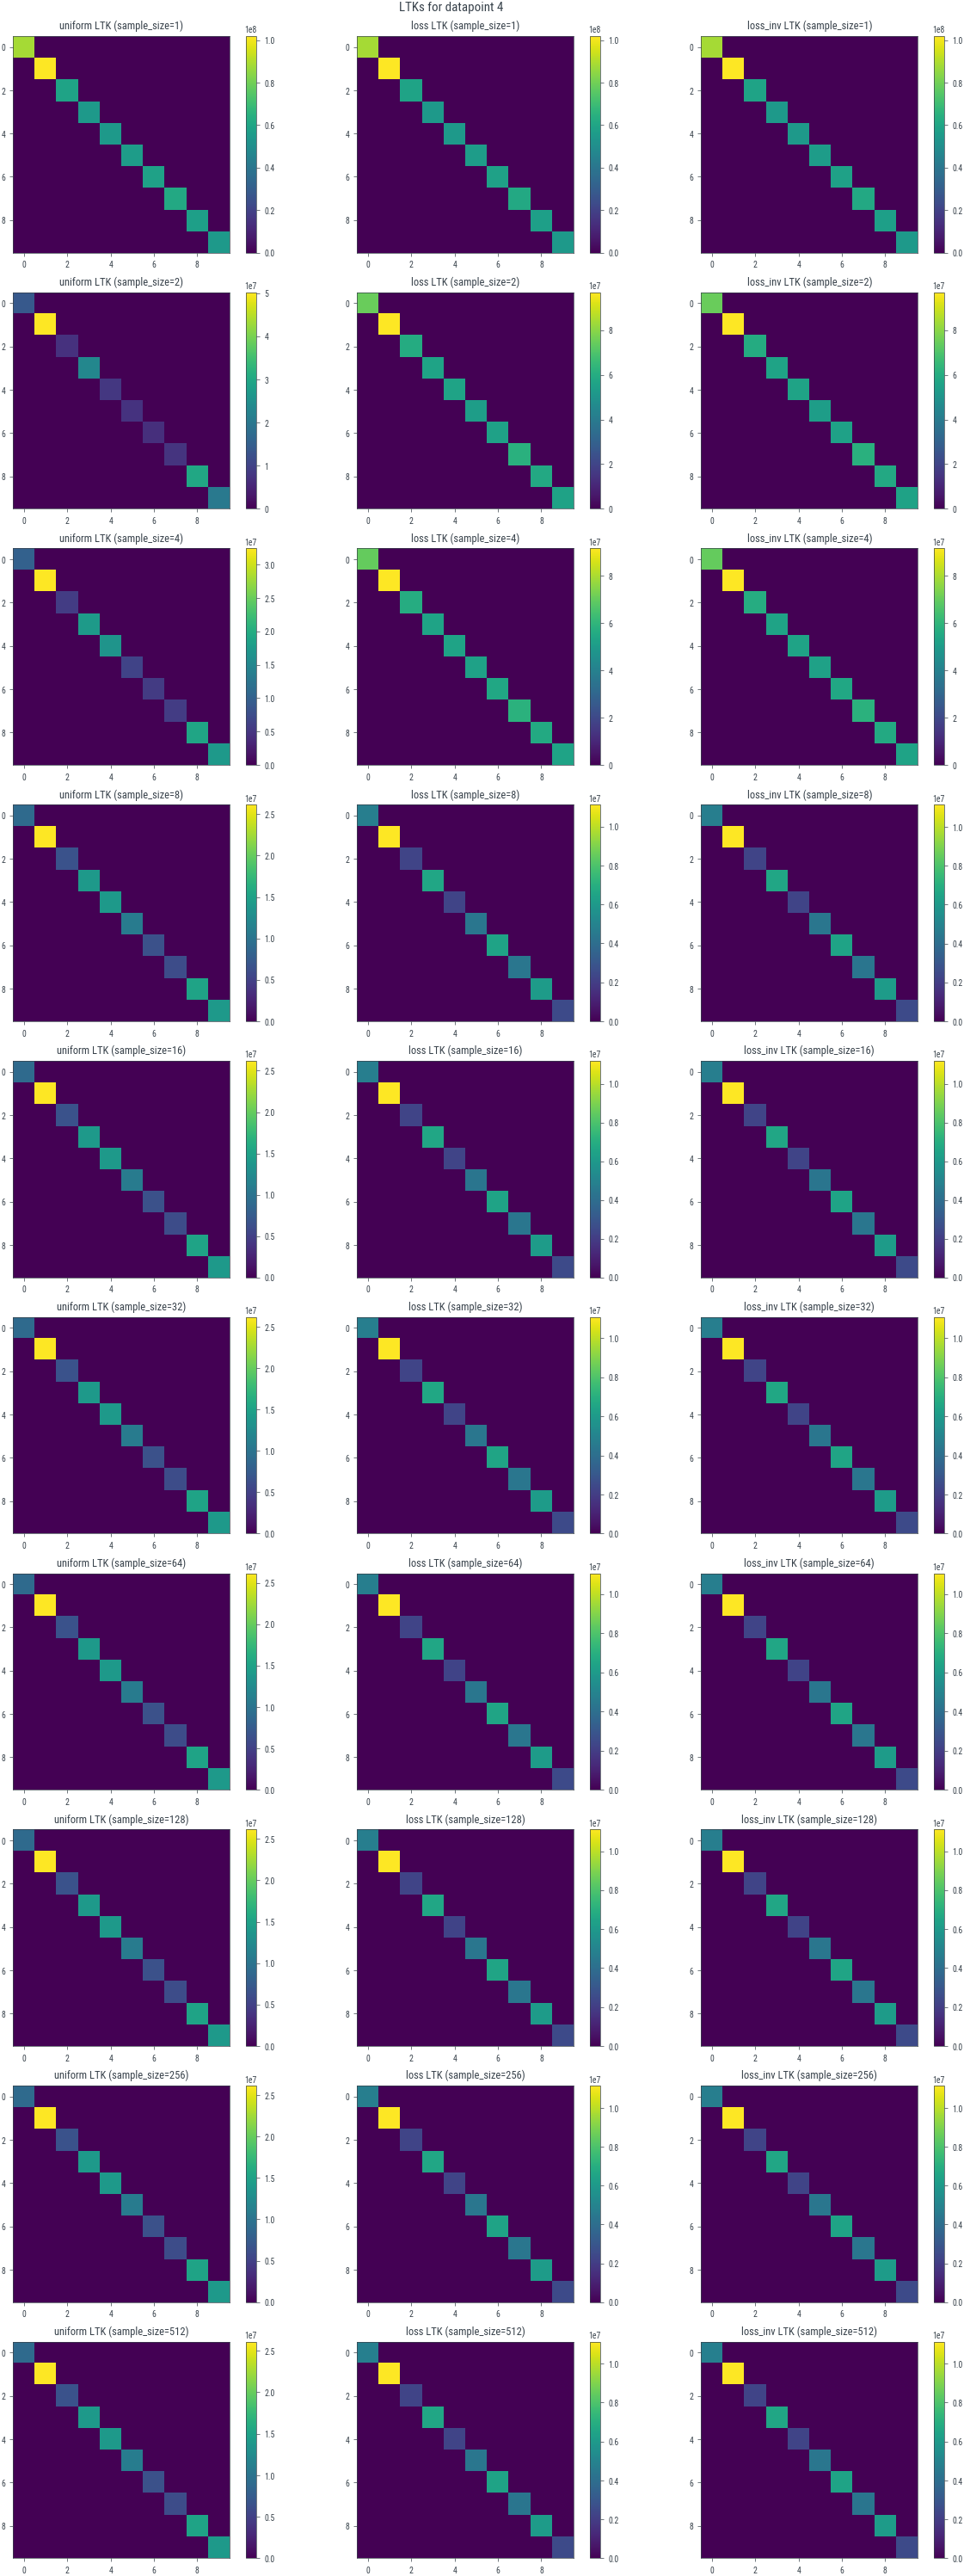

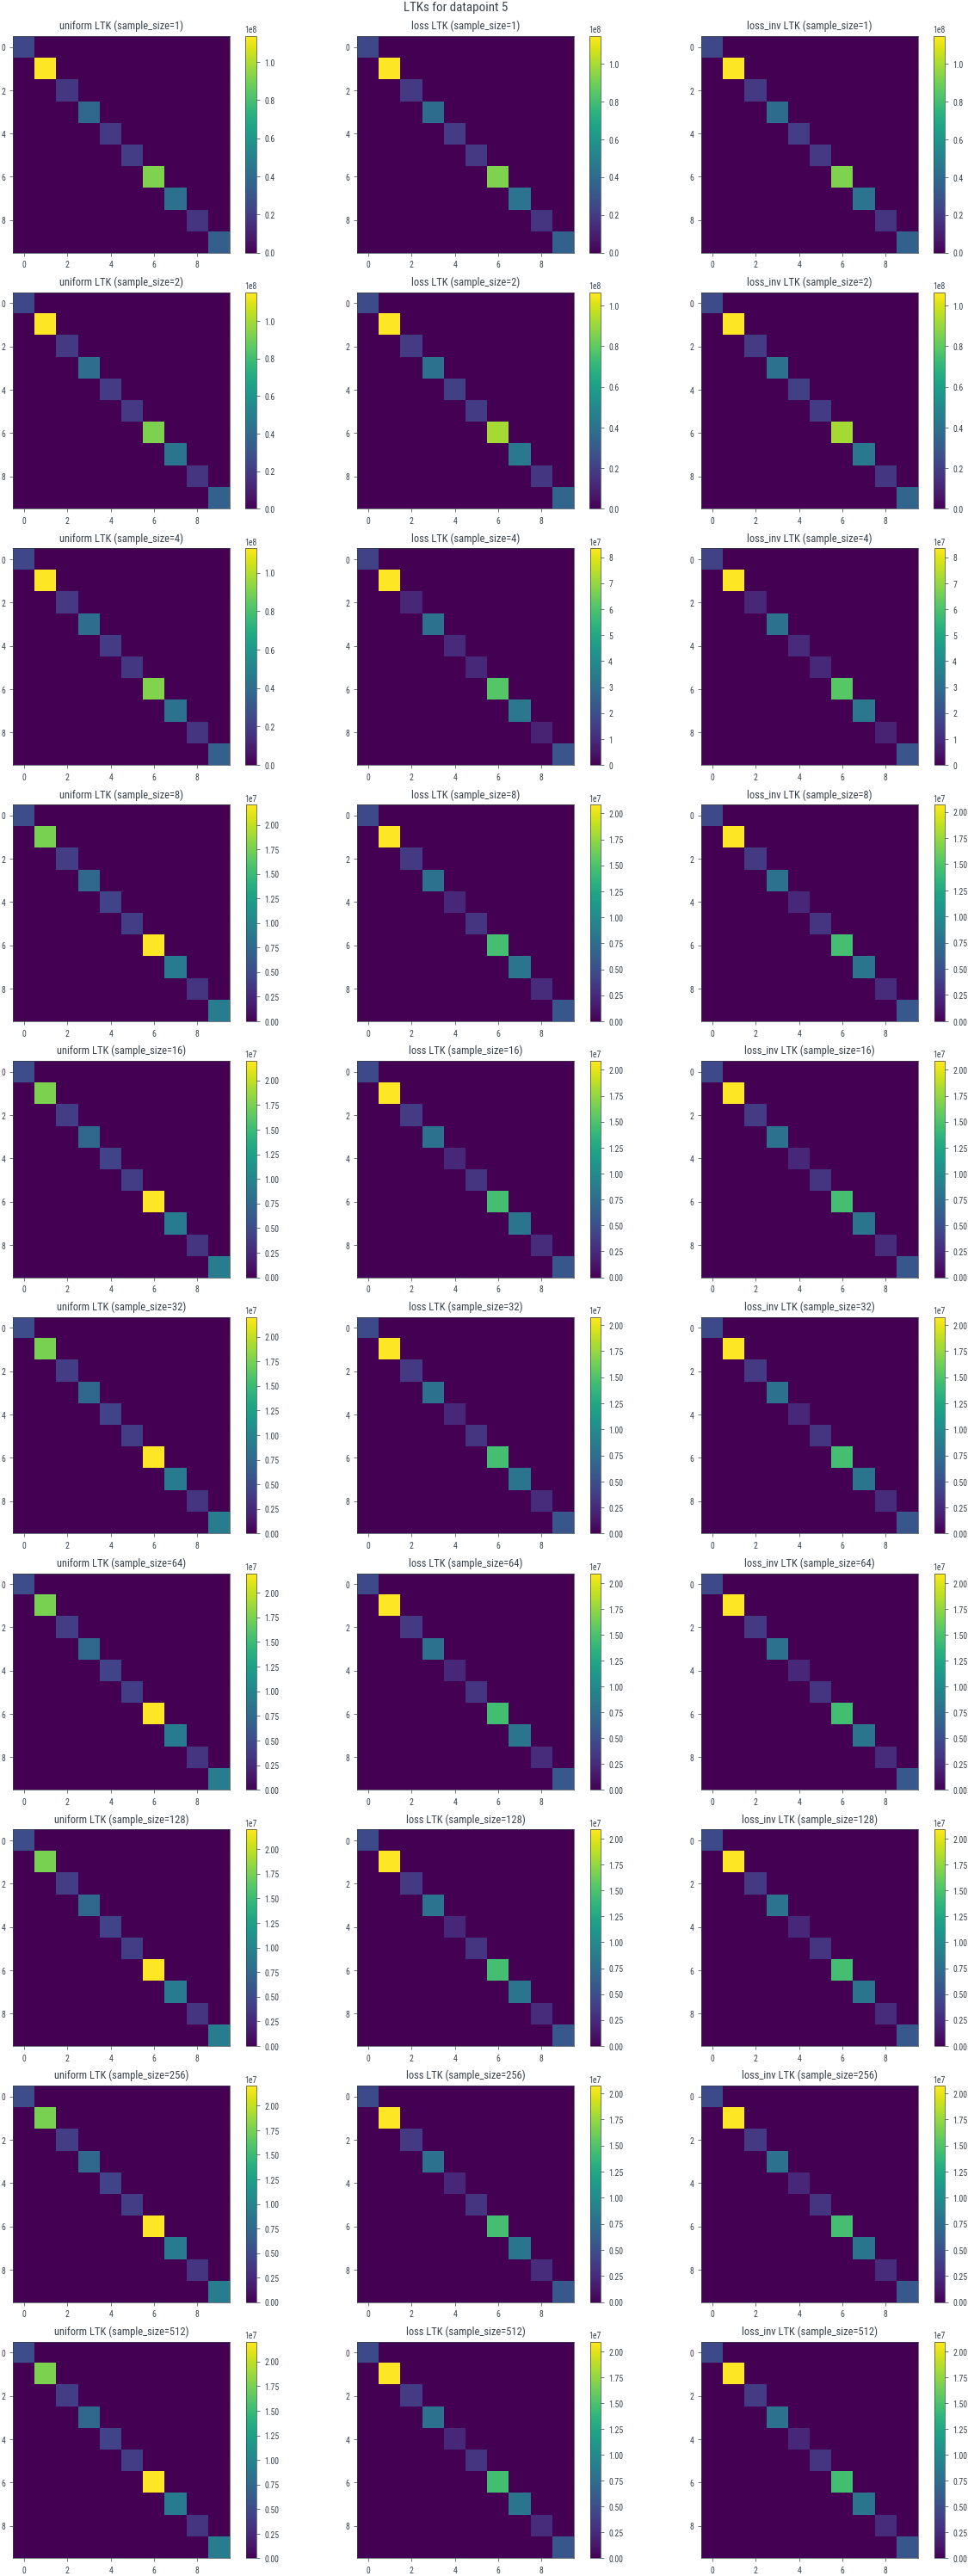

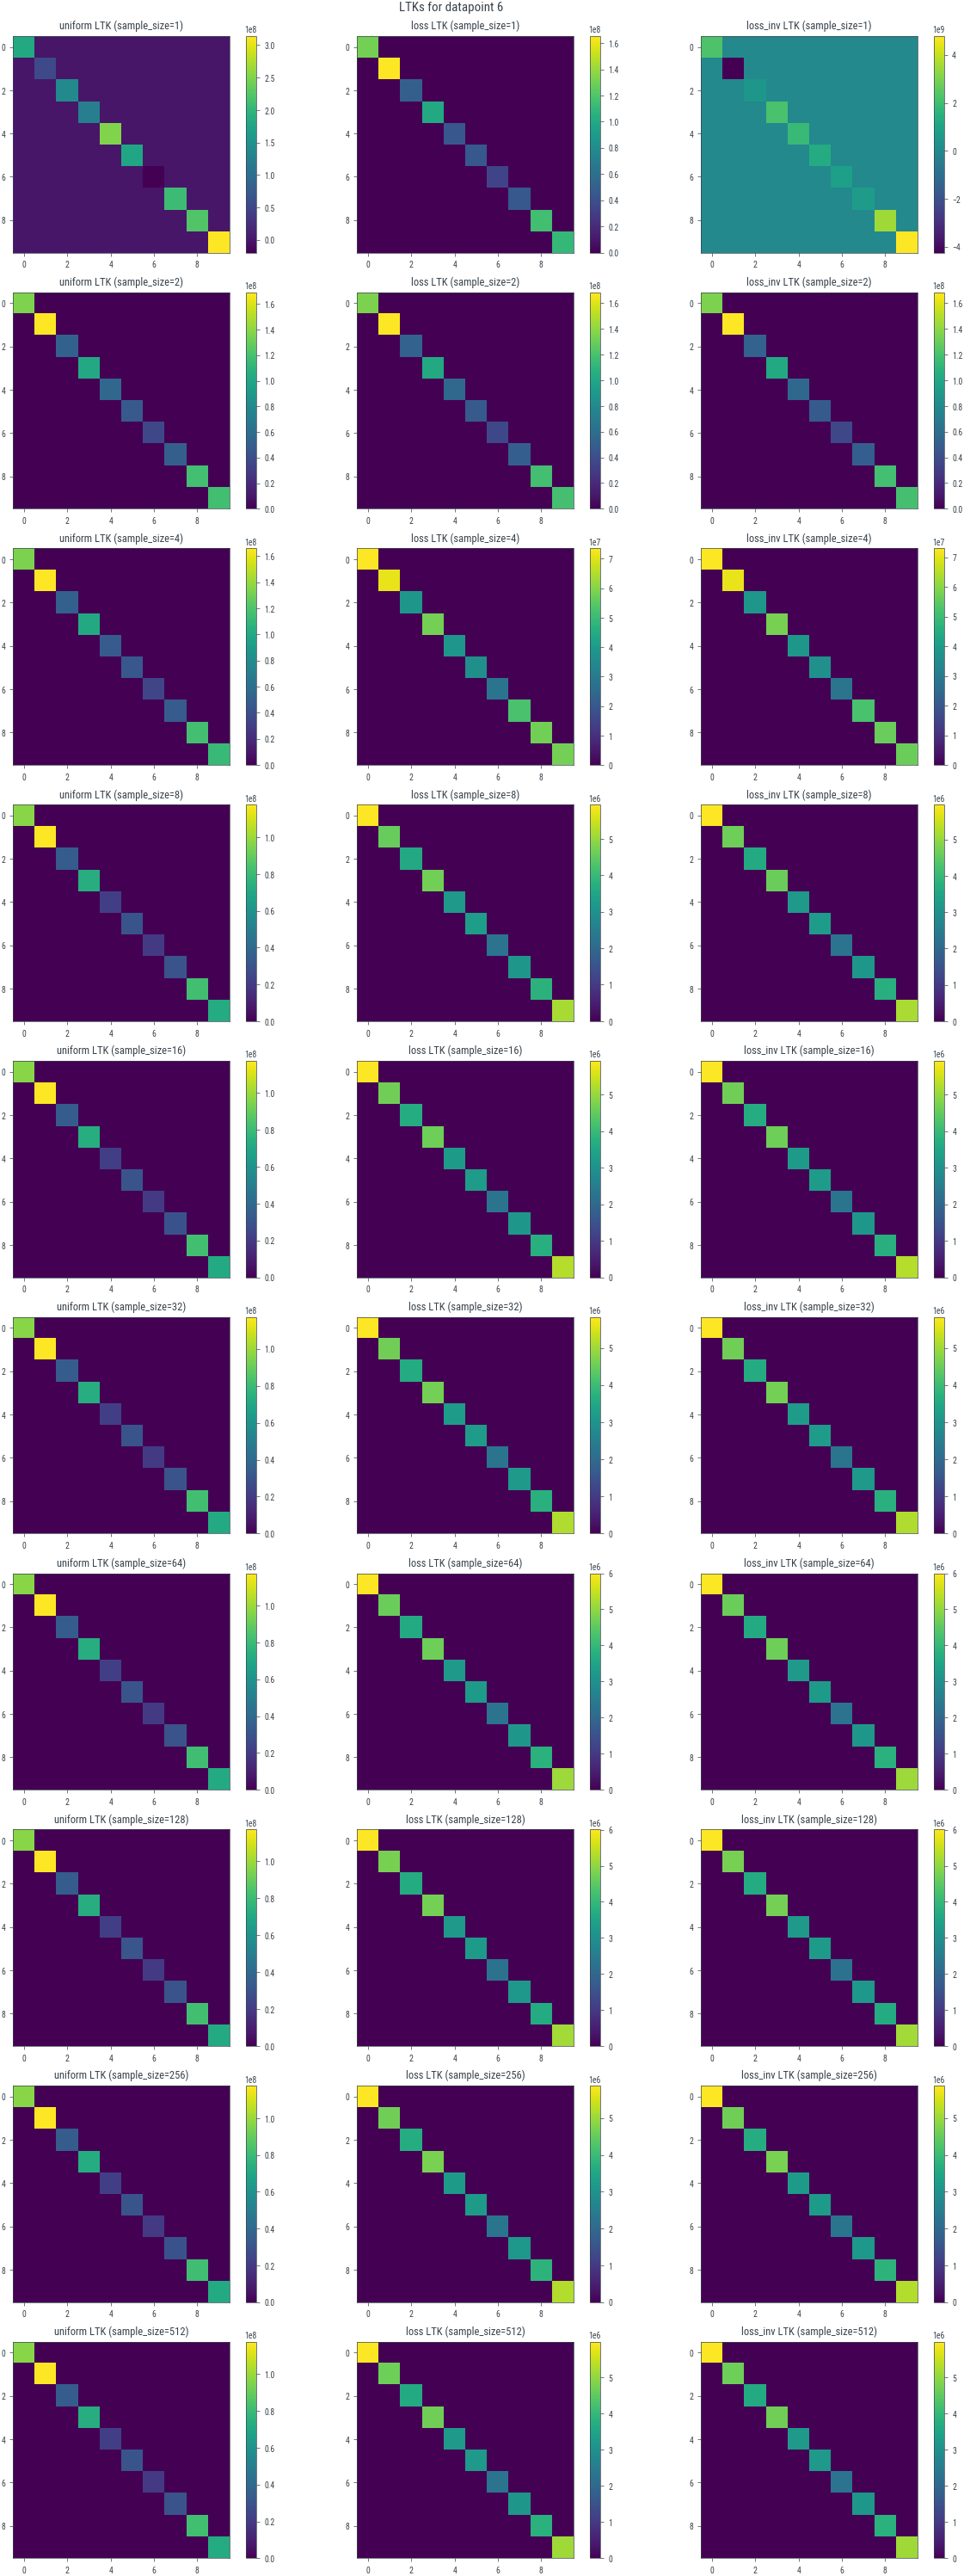

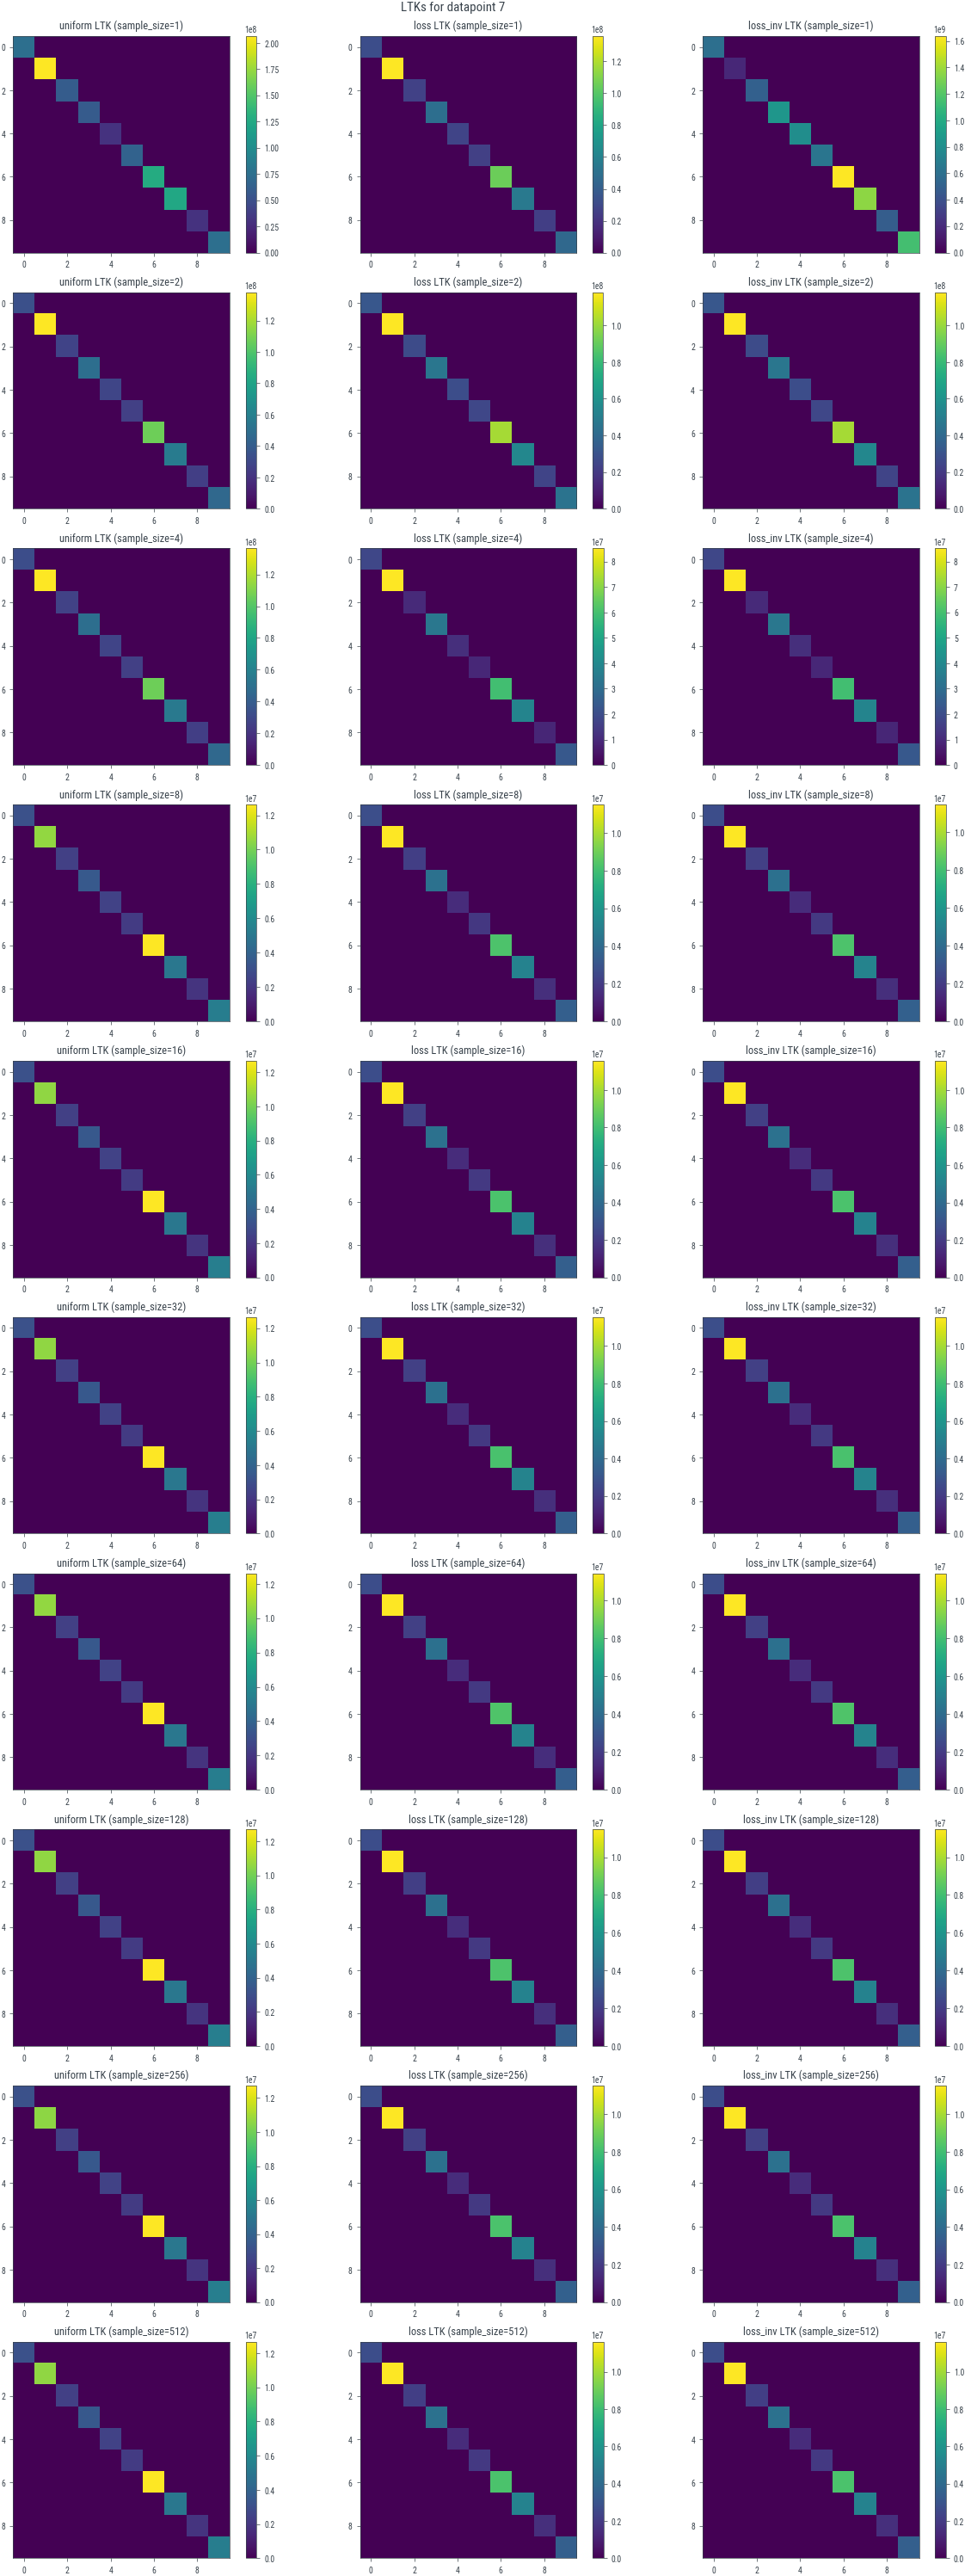

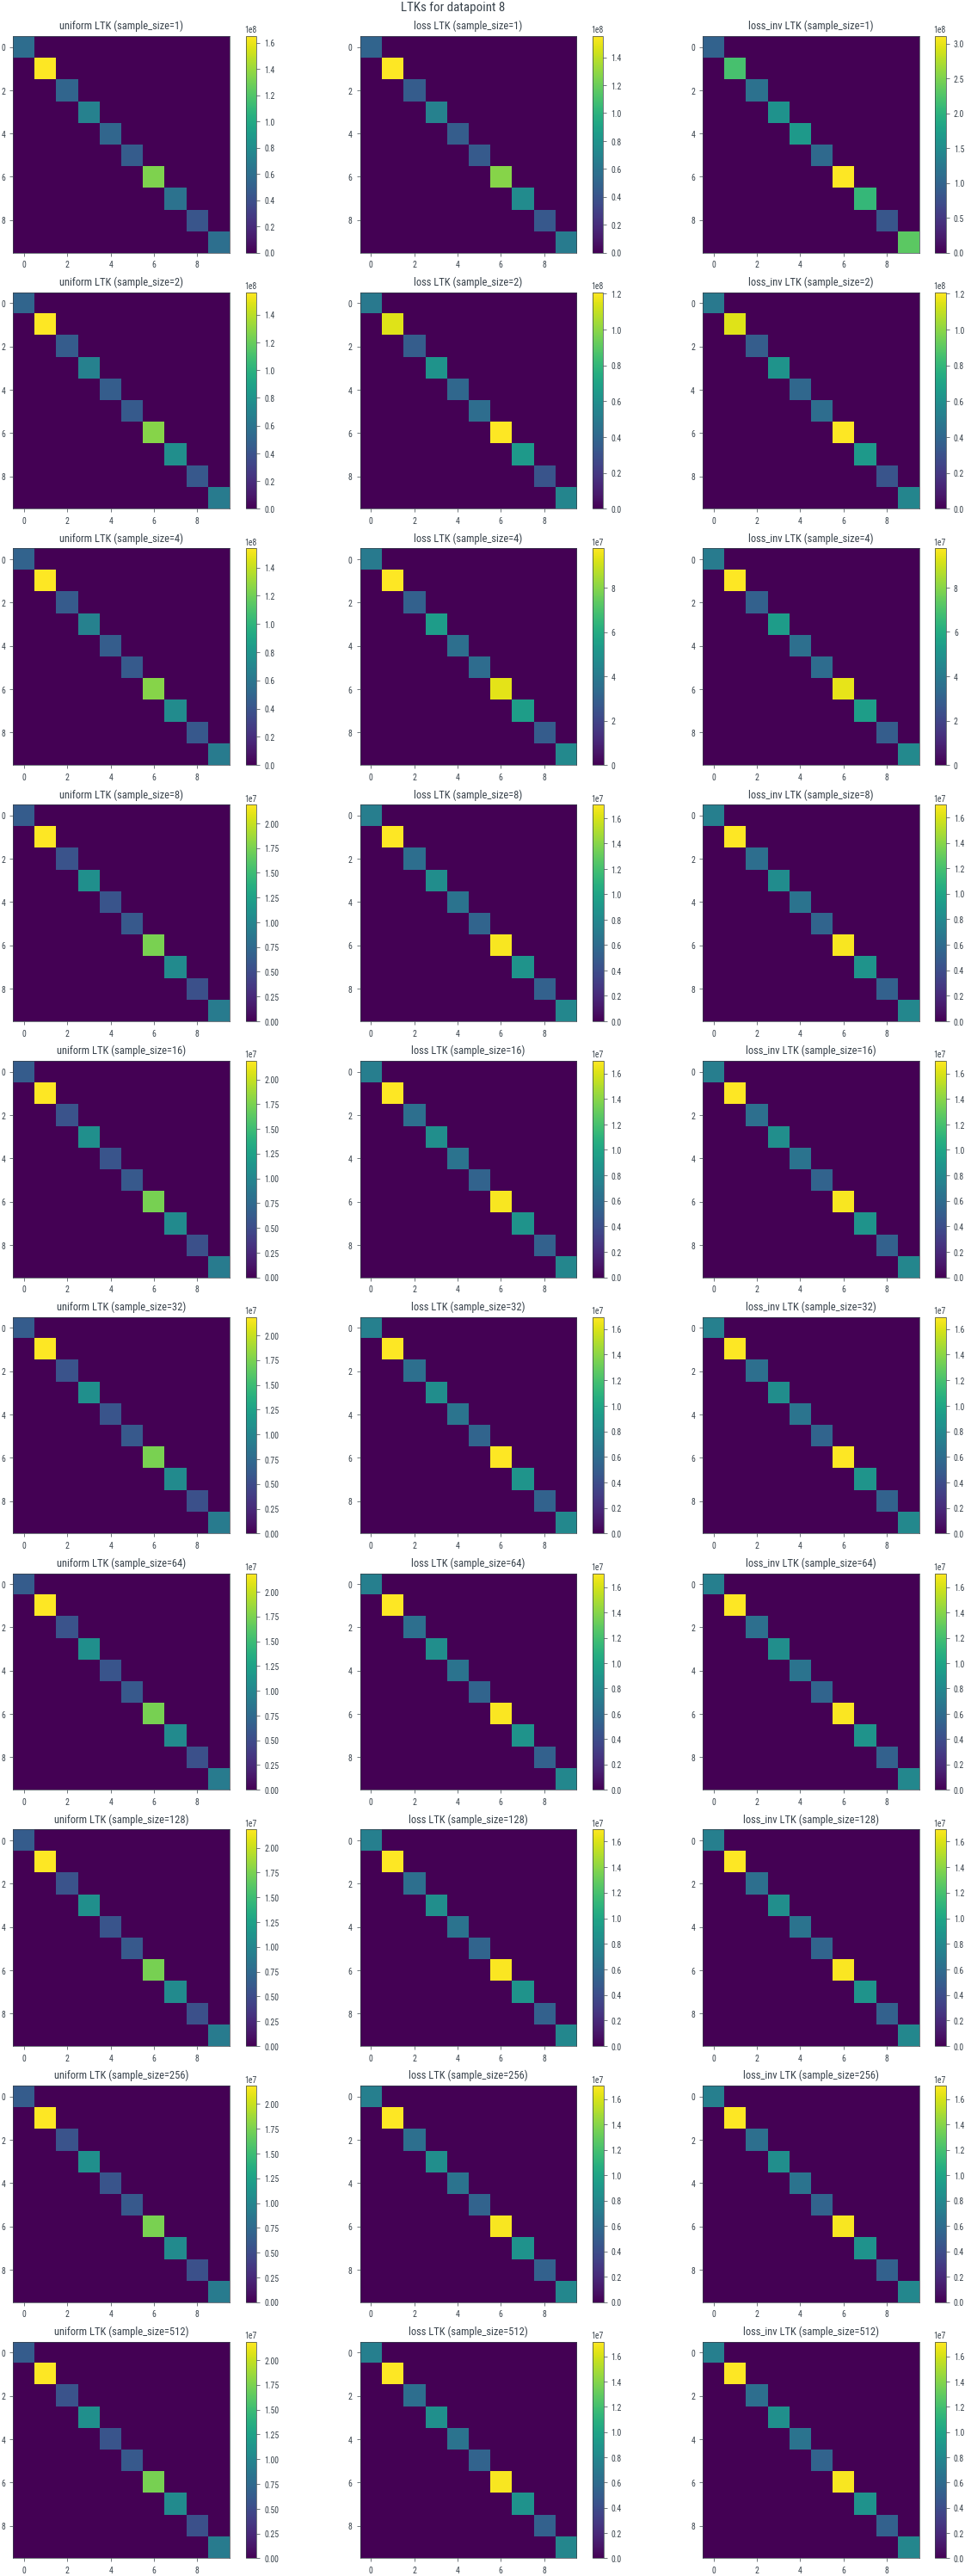

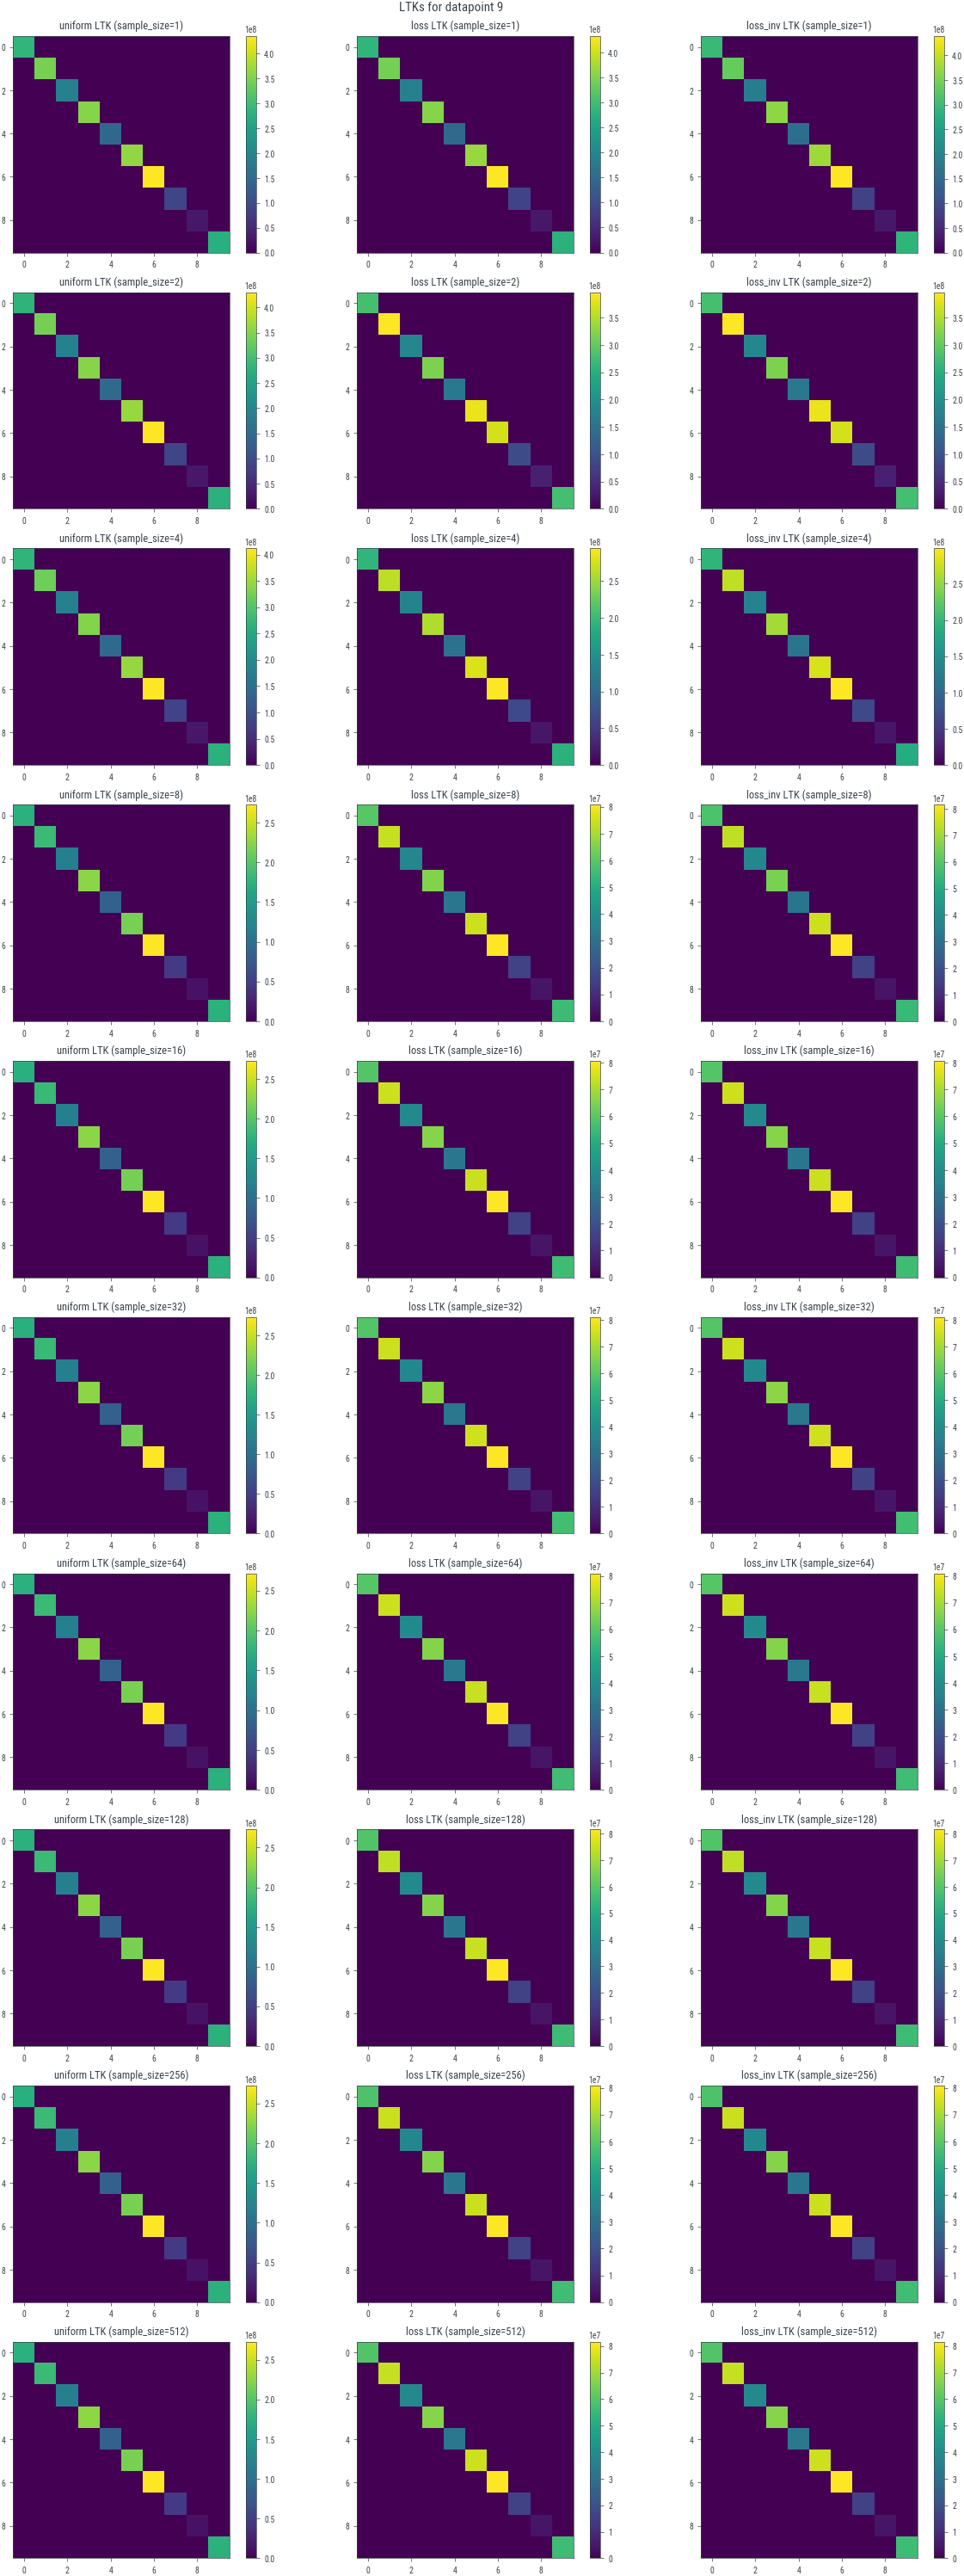

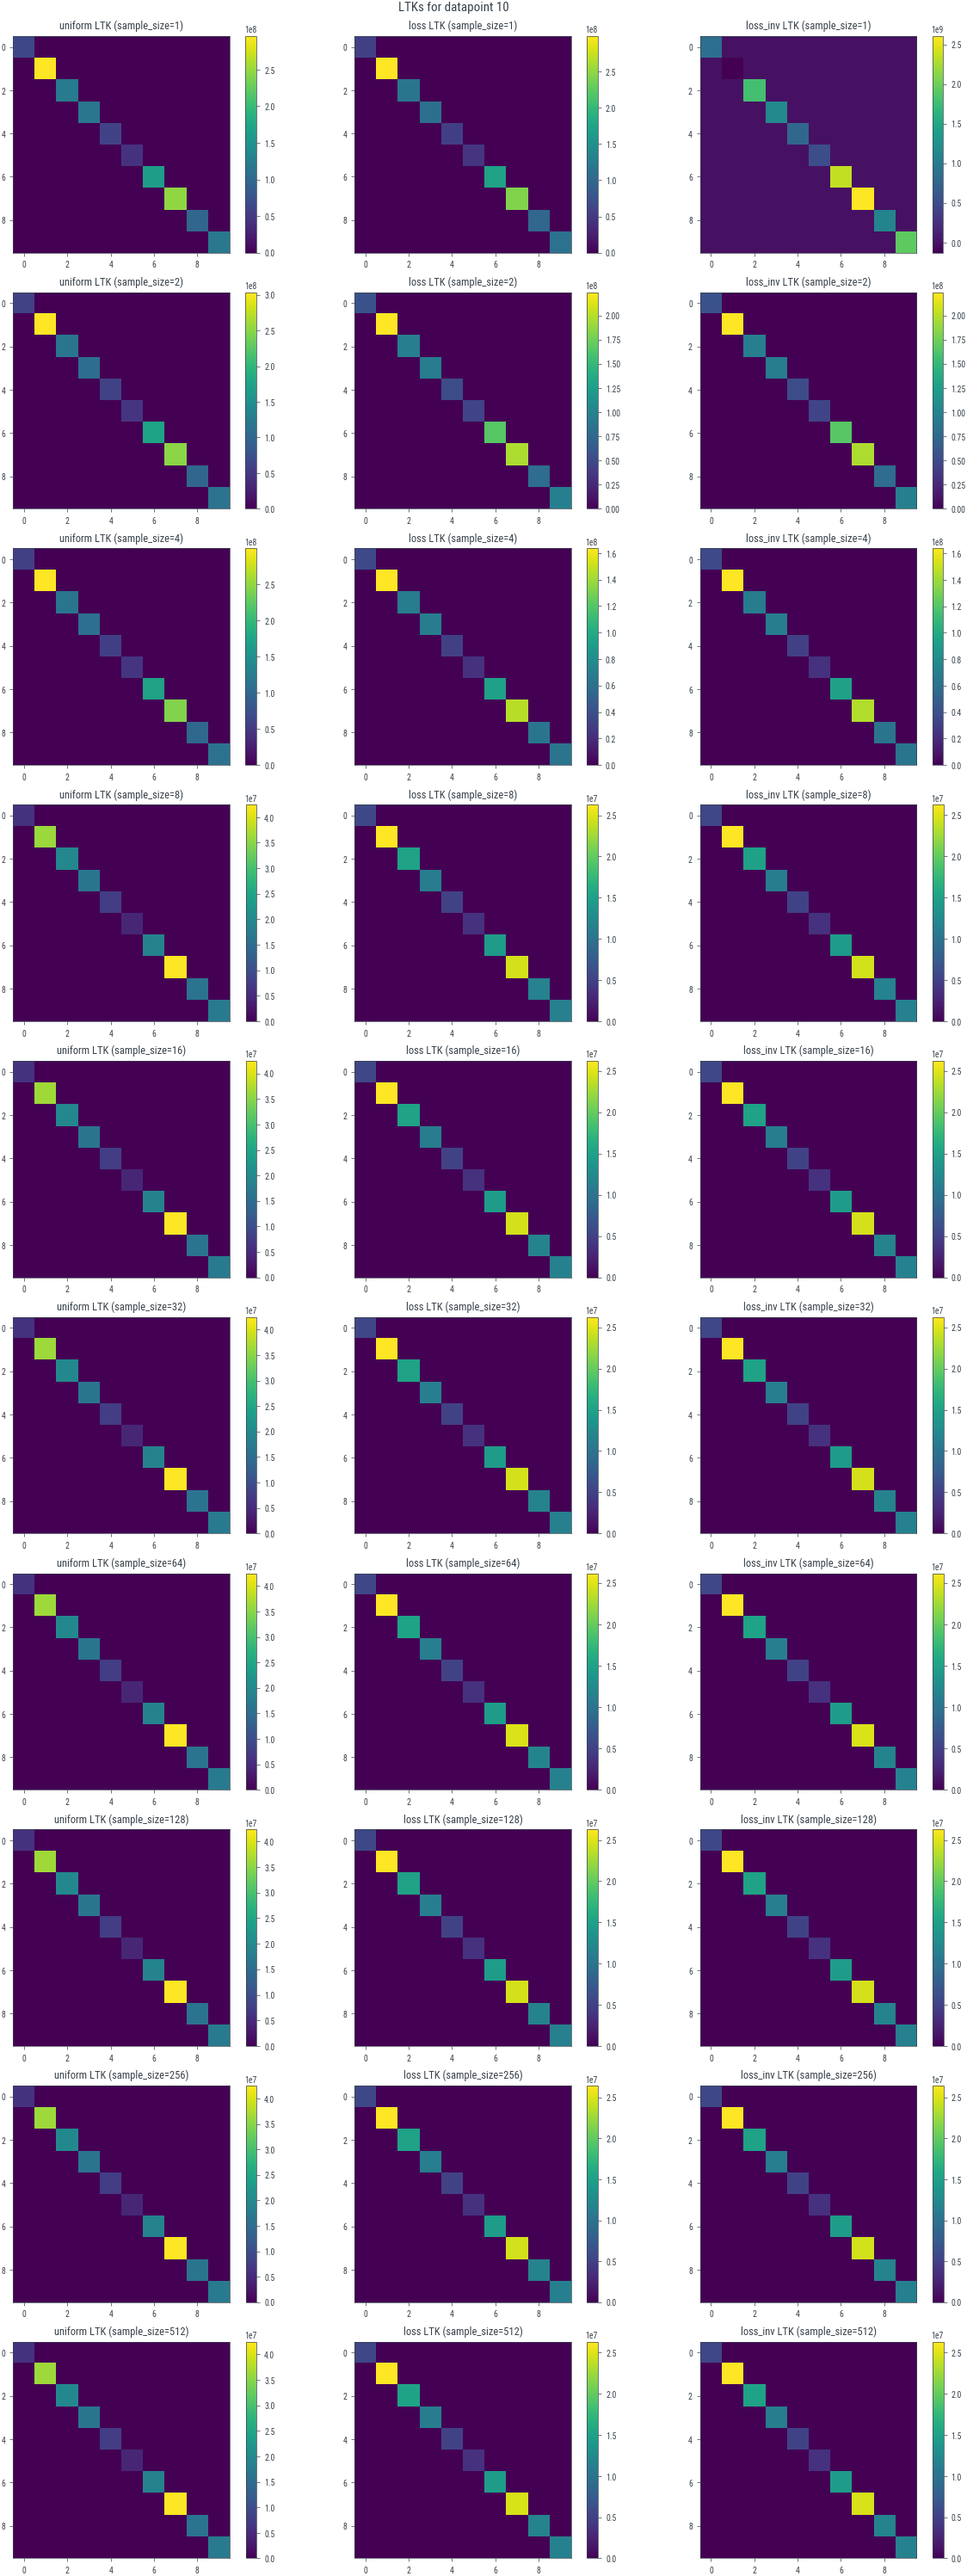

In [15]:
for test_sample_idx in range(num_test_samples):
    fig, axs = plt.subplots(len(sample_sizes), len(sampling_methods), figsize=(12, 30))

    for samples_idx, sample_size in enumerate(sample_sizes):
        for method_idx, sampling_method in enumerate(sampling_methods):
            ltk_diag = np.diag(laplace_diagonals[sampling_method][samples_idx, test_sample_idx])
            
            p = axs[samples_idx, method_idx].imshow(ltk_diag)
            fig.colorbar(p)
            
            if sampling_method == "total":
                axs[samples_idx, method_idx].set_title(f"{sampling_method} LTK")
            else:
                axs[samples_idx, method_idx].set_title(f"{sampling_method} LTK (sample_size={sample_size})")
    
    plt.suptitle(f"LTKs for datapoint {test_sample_idx + 1}")
    plt.show();